In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from metadPy.sdt import rates, dprime, criterion
from metadPy.utils import trials2counts, discreteRatings
from scipy.stats import norm
import seaborn as sns
import numpy as np
import pingouin as pg
from systole.detection import oxi_peaks, rr_artefacts

sns.set_context('paper')

Import summary statistics from behavioral data

In [2]:
path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
group_df = pd.read_csv(path + '/data/behavior.txt')
group_df = group_df[group_df.Session == 'Del1']

# Metacognition

In [21]:
metadprime = pd.read_csv('metadprime.txt', sep='\t')

FileNotFoundError: [Errno 2] File metadprime.txt does not exist: 'metadprime.txt'

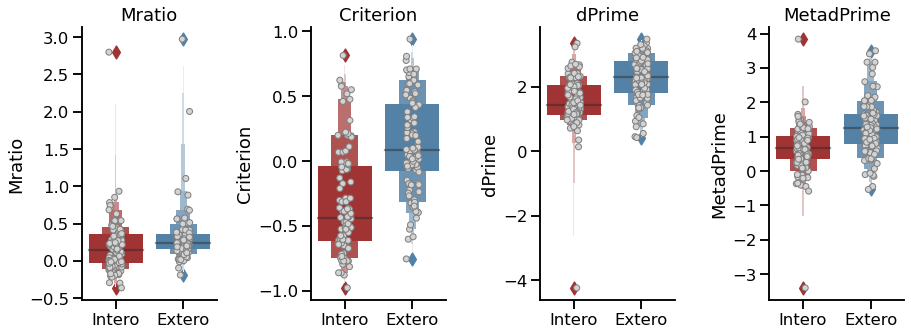

In [39]:
sns.set_context('talk')
fig, axs = plt.subplots(1, 4, figsize=(13, 5))
axs = axs.ravel()
for i, metric in enumerate(['Mratio', 'Criterion', 'dPrime', 'MetadPrime']):
    sns.boxenplot(data=metadprime, x='Modality', y=metric, ax=axs[i], palette=['firebrick', 'steelblue'])
    sns.stripplot(data=metadprime, x='Modality', y=metric, ax=axs[i], color='lightgray', linewidth=1, size=6, alpha=1, dodge=True)
    axs[i].set_title(metric)
    axs[i].set_ylabel(metric)
    axs[i].set_xlabel('')
plt.tight_layout()
sns.despine()
plt.savefig('metadprime.png', dpi=600)

In [40]:
pg.pairwise_ttests(data=metadprime, dv='MetadPrime', within='Modality')

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,Modality,Intero,Extero,True,True,-7.099607,95.0,two-sided,2.256079e-10,4.236e+07,-0.824003


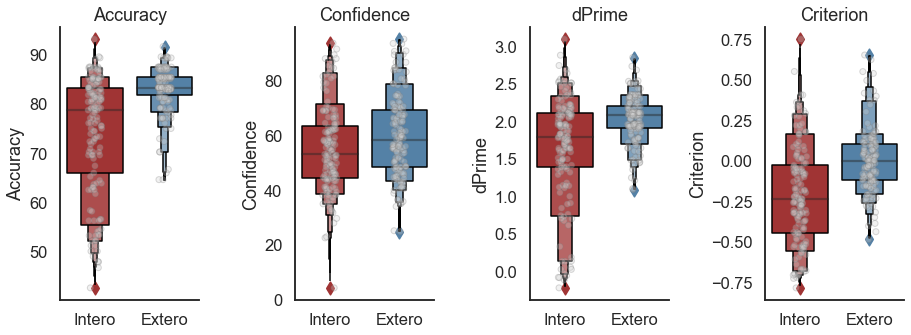

In [21]:
sns.set_context('talk')
fig, axs = plt.subplots(1, 4, figsize=(13, 5))
axs = axs.ravel()
for i, metric in enumerate(['Accuracy', 'Confidence', 'dPrime', 'Criterion']):
    sns.boxenplot(data=group_df, x='Modality', y=metric, ax=axs[i], palette=['firebrick', 'steelblue'])
    sns.stripplot(data=group_df, x='Modality', y=metric, ax=axs[i], color='lightgray', linewidth=1, size=6, alpha=.3, dodge=True)
    axs[i].set_title(metric)
    axs[i].set_ylabel(metric)
    axs[i].set_xlabel('')
plt.tight_layout()
sns.despine()
#plt.savefig('metacognition.png', dpi=600)

In [12]:
pg.pairwise_ttests(data=group_df, dv='dPrime', within='Modality')

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,Modality,Intero,Extero,True,True,-4.928153,70.0,two-sided,0.000005,3132.855,-0.790938
